In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

In [39]:
# Step 1: Read Dataset
file_path = 'winequality-red.csv'
data = pd.read_csv(file_path)

In [40]:
# Step 2: Exploratory Data Analysis
print("Head of the DataFrame:\n", data.head())
print("Tail of the DataFrame:\n", data.tail())
print("Shape of the DataFrame:\n", data.shape)
print("Info of the DataFrame:\n")
data.info()
print("Description of the DataFrame:\n", data.describe())
print("Unique values:\n", data.nunique())
print("Value counts:\n", data['quality'].value_counts())

Head of the DataFrame:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        

In [41]:
# Step 3: Preprocessing
# Removing missing values
data = data.dropna()

# Removing duplicates
data = data.drop_duplicates()

# Removing outliers (for simplicity, we'll use Z-score method to remove outliers)
def remove_outliers(df):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < 3).all(axis=1)]

data = remove_outliers(data)

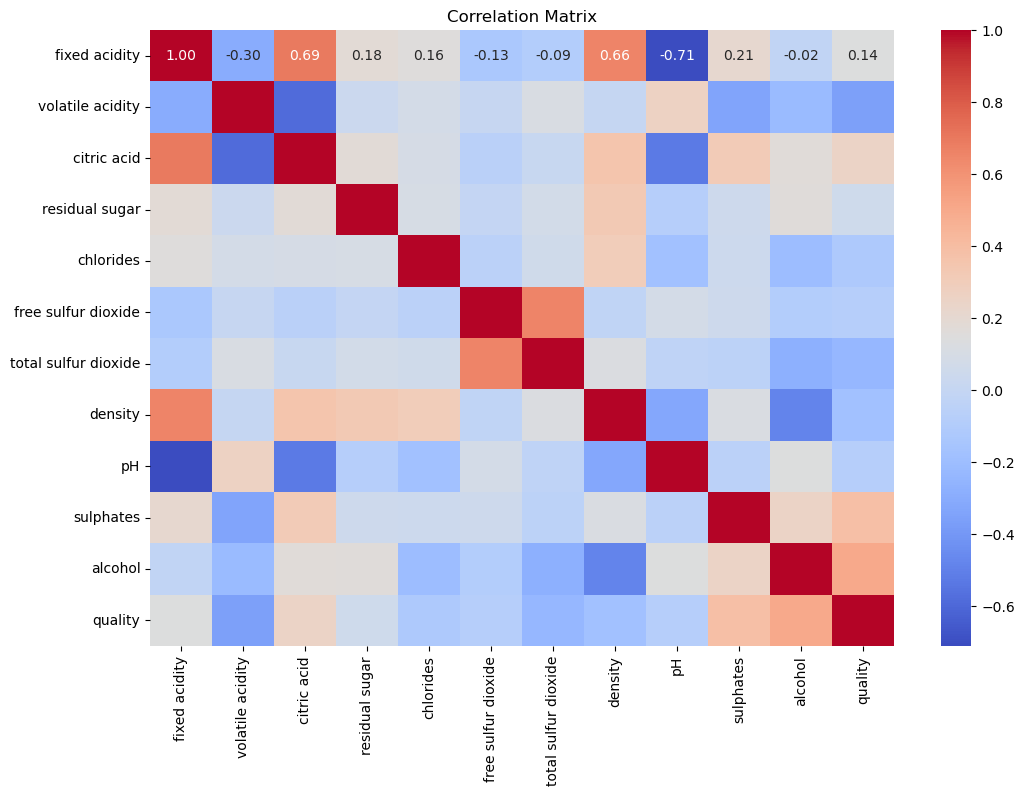

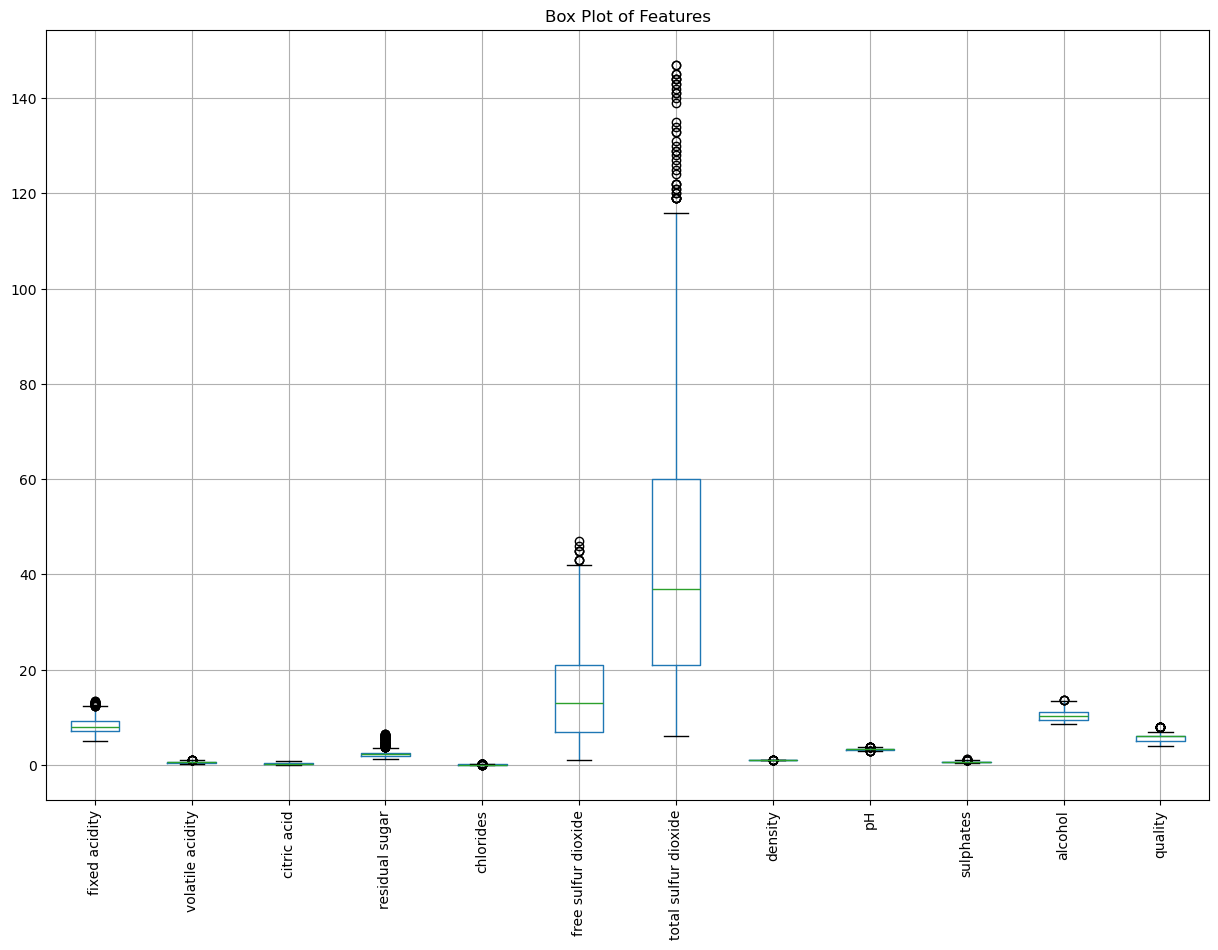

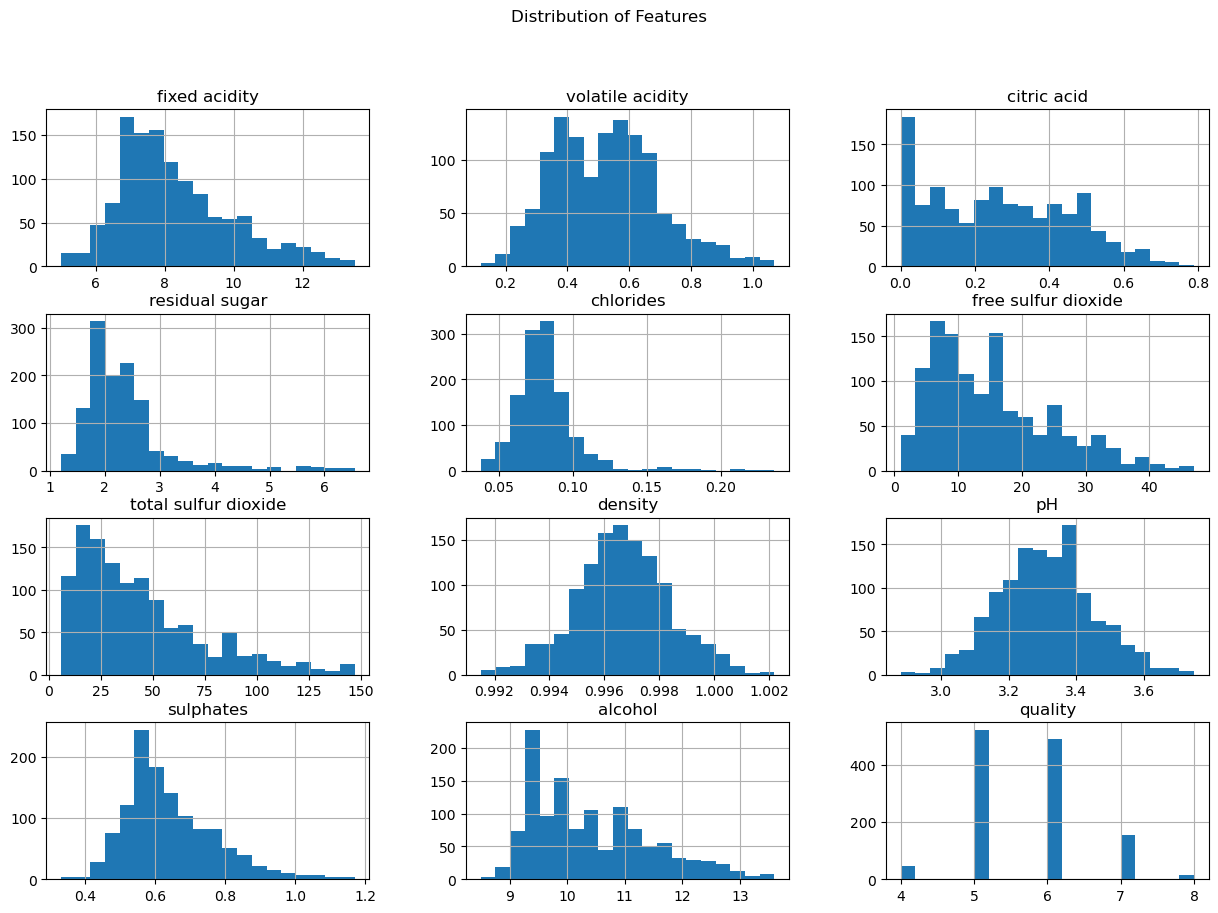

In [42]:
# Step 4: Feature Engineering

# Standardizing the features manually
def standardize(column):
    return (column - column.mean()) / column.std()

# Apply standardization
X = data.drop('quality', axis=1).apply(standardize)
y = data['quality']

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Box Plot for each feature
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

# Distribution Plot for each feature
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()

# Feature Selection (Keep features with correlation greater than 0.1 with 'quality')
correlation_matrix = data.corr()
correlation_with_quality = correlation_matrix['quality'].abs().sort_values(ascending=False)
selected_features = correlation_with_quality[correlation_with_quality > 0.1].index.tolist()
selected_features.remove('quality')

# Update X to only include selected features
X_selected = X[selected_features]

In [43]:
# Step 5: Implementation of Model
model = LinearRegression()

In [44]:
# Step 6: Training and Testing the Model
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

In [45]:
# Step 7: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Converting regression results to classification for quality prediction
y_pred_class = np.round(y_pred).astype(int)

# Ensure predictions are within valid range
y_pred_class = np.clip(y_pred_class, y_test.min(), y_test.max())

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_class, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_class, average='weighted', zero_division=1)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Mean Squared Error: 0.41704055885126934
R^2 Score: 0.3839412238509179
Accuracy: 0.6032388663967612
Precision: 0.6257353195612305
Recall: 0.6032388663967612
F1 Score: 0.5706182088478641
